In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Add this line
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

df = pd.read_csv('Datasets/anxiety_depression_data.csv')
print("First few rows of the dataset:")
print(df.head())

print(f"Dataset shape: {df.shape}")
print(f"Missing values:\n{df.isnull().sum()}")

First few rows of the dataset:
   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  Family_History_Mental_Illness  \
0                 2             9                              0   
1                 7             6                  

In [30]:
# 1. Data Preprocessing - One-Hot Encoding
categorical_columns = ['Gender', 'Education_Level', 'Employment_Status', 'Meditation']
X = df.copy()
X_encoded = pd.get_dummies(X, columns=categorical_columns, prefix=categorical_columns)
X = X_encoded

# Define target variables
y = df[['Depression_Score', 'Anxiety_Score']]

# Remove target variables from features
X = X.drop(['Depression_Score', 'Anxiety_Score'], axis=1)

print("Shape after encoding:", X.shape)
print("\nFeature names:")
print(X.columns.tolist())

Shape after encoding: (1200, 27)

Feature names:
['Age', 'Sleep_Hours', 'Physical_Activity_Hrs', 'Social_Support_Score', 'Stress_Level', 'Family_History_Mental_Illness', 'Chronic_Illnesses', 'Therapy', 'Financial_Stress', 'Work_Stress', 'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score', 'Gender_Female', 'Gender_Male', 'Gender_Non-Binary', 'Gender_Other', "Education_Level_Bachelor's", 'Education_Level_High School', "Education_Level_Master's", 'Education_Level_Other', 'Education_Level_PhD', 'Employment_Status_Employed', 'Employment_Status_Retired', 'Employment_Status_Student', 'Employment_Status_Unemployed', 'Meditation_Meditation']


In [31]:
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (960, 27), Test set: (240, 27)


In [32]:
# 3. Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data after scaling:")
print(f"Mean: {X_train_scaled.mean(axis=0).round(10)}")
print(f"Std: {X_train_scaled.std(axis=0)}")

Training data after scaling:
Mean: [-0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0. -0.  0. -0.  0.  0.  0.
  0.  0.  0. -0.  0.  0.  0. -0.  0.]
Std: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0.]


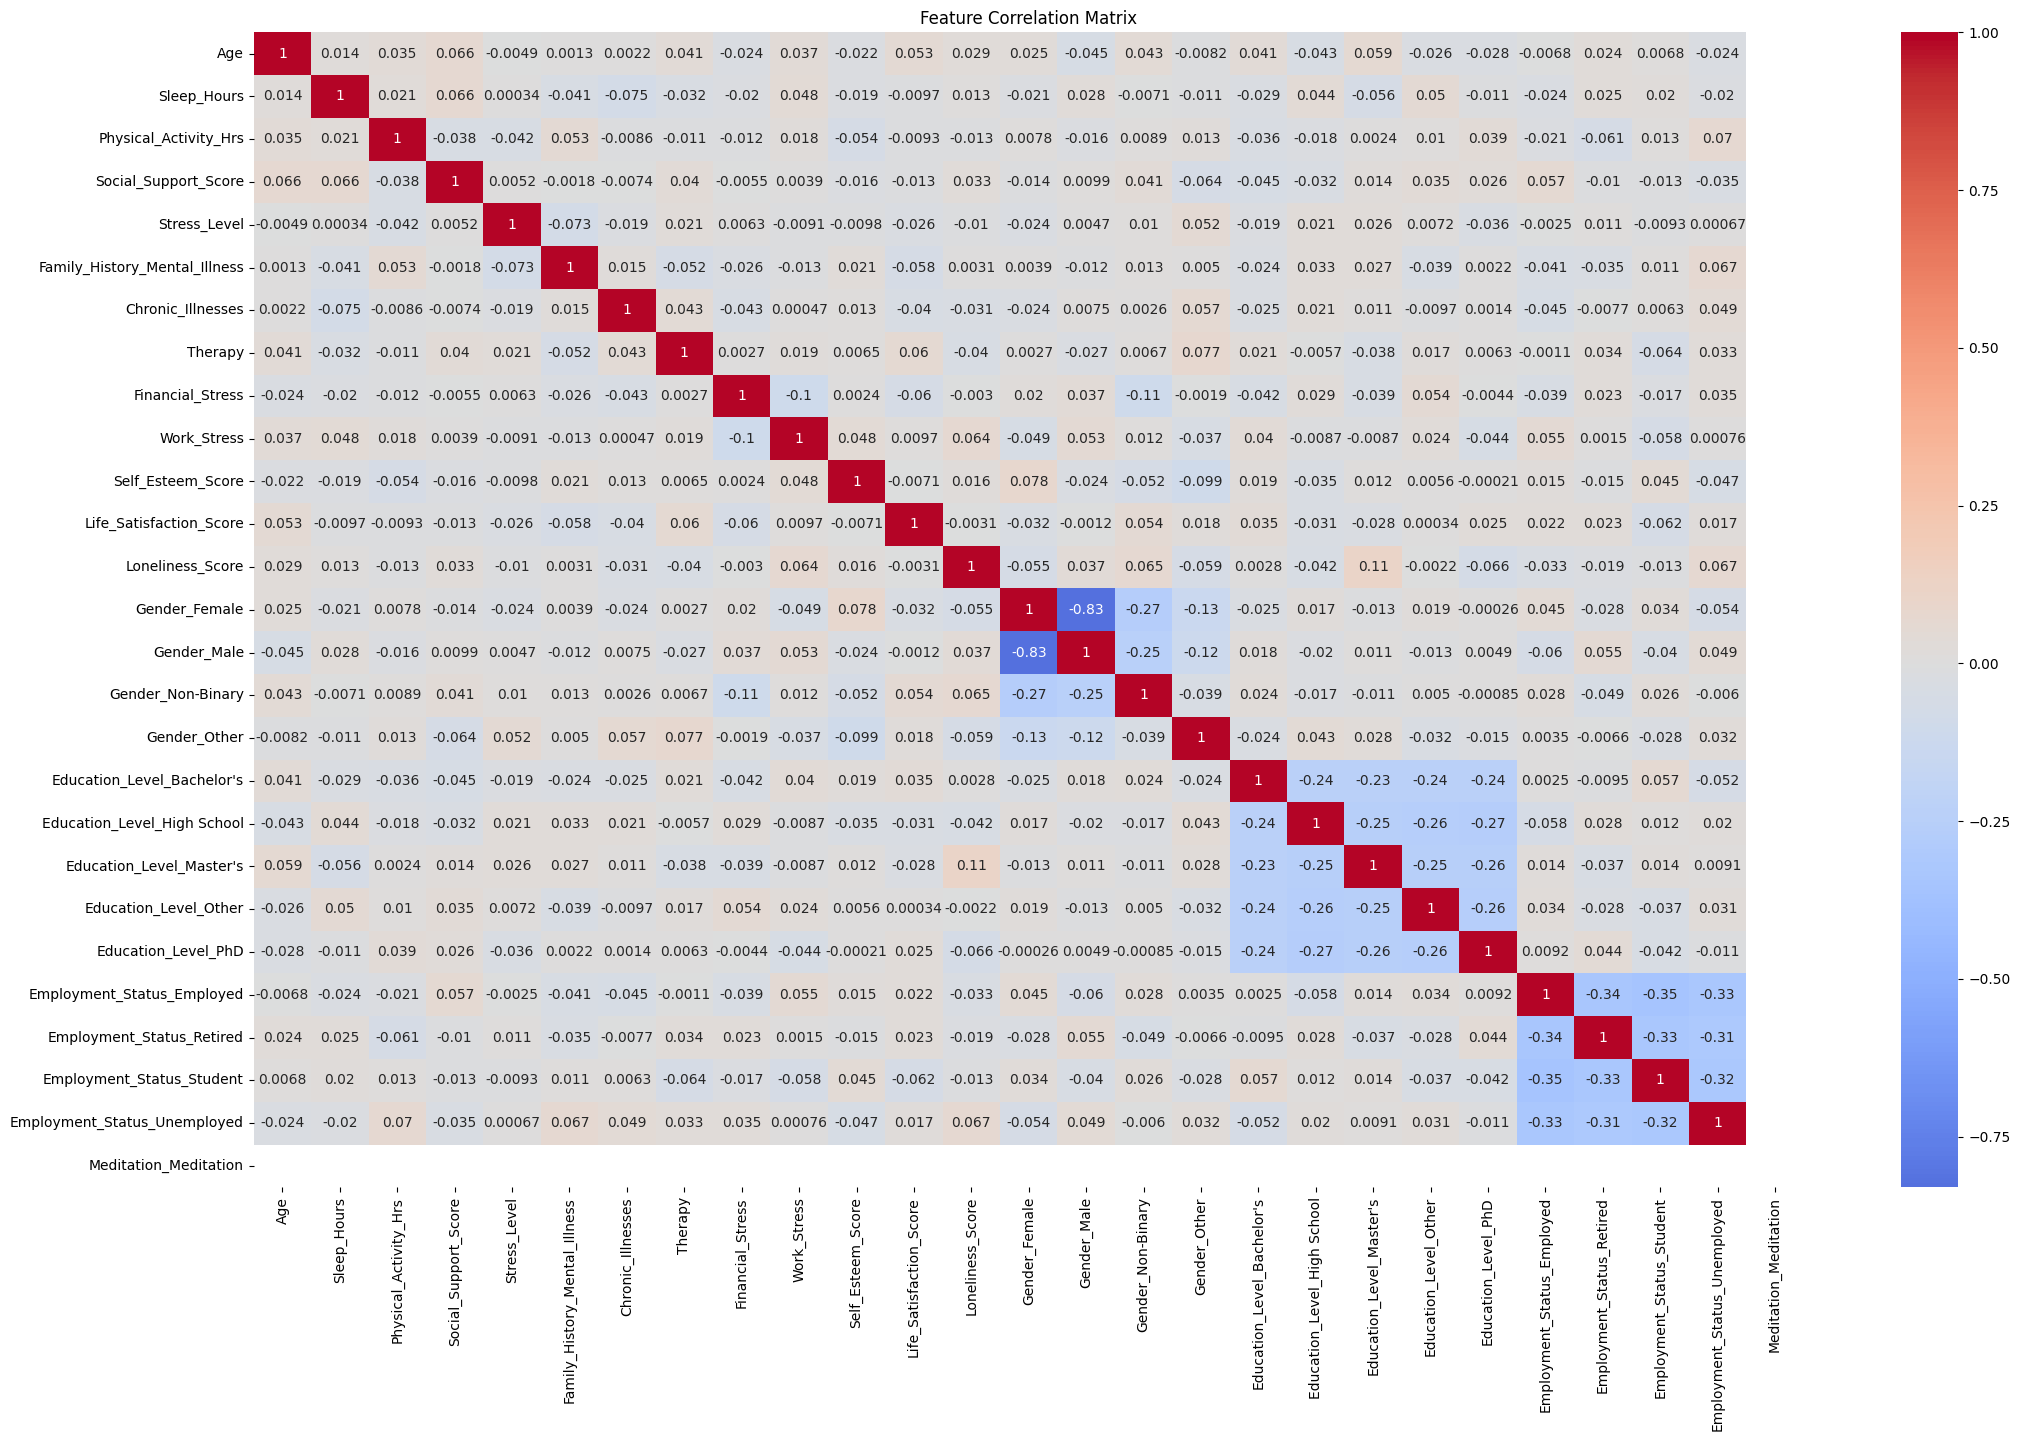

In [46]:
# 4. Correlation Analysis
correlation_matrix = X_train.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [38]:
# 5. SelectKBest Feature Selection
k = 10  # Number of top features to select

# Create a combined target score (average of Anxiety and Depression)
y_combined = (y_train['Anxiety_Score'] + y_train['Depression_Score']) / 2

# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_combined)
X_test_selected = selector.transform(X_test_scaled)

# Get selected features and their importance scores
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': selector.scores_
})
feature_scores = feature_scores.sort_values('Importance', ascending=False)

print("Top {} most important features:".format(k))
print(feature_scores.head(k))

Top 10 most important features:
                         Feature  Importance
7                        Therapy    1.532042
25  Employment_Status_Unemployed    1.086382
4                   Stress_Level    1.049804
9                    Work_Stress    1.009082
6              Chronic_Illnesses    0.997598
24     Employment_Status_Student    0.979737
2          Physical_Activity_Hrs    0.958780
18   Education_Level_High School    0.952451
13                 Gender_Female    0.915714
12              Loneliness_Score    0.912178


c:\Users\Chetak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [26] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Chetak\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
